# Process V02 Parametric Output

In [42]:

import os
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [69]:
## Plotting config for report
# src: https://python4astronomers.github.io/plotting/publication.html
# Set the font size and style
plt.rc('font', size=12)
plt.rc('font', family='sans-serif')
plt.rc('font', serif='Arial')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Set the Seaborn style
sns.set(style="white")
#sns.set_context("paper")

In [3]:
SIMULATION_FOLDER = "report_simulations"

base_folder = os.getcwd()
output_folder = os.path.join(base_folder, 'output')
result_folder = os.path.join(output_folder, SIMULATION_FOLDER, "v02", "csv_v02")
print(f"Reading CSV result in folder: {result_folder}")

Reading CSV result in folder: /home/enrique/Desktop/git-repos/PoF_Simulation_PYTHON/output/report_simulations/v02/csv_v02


Reading results of parametric: users_output-parametric.csv
1. Throughput plot


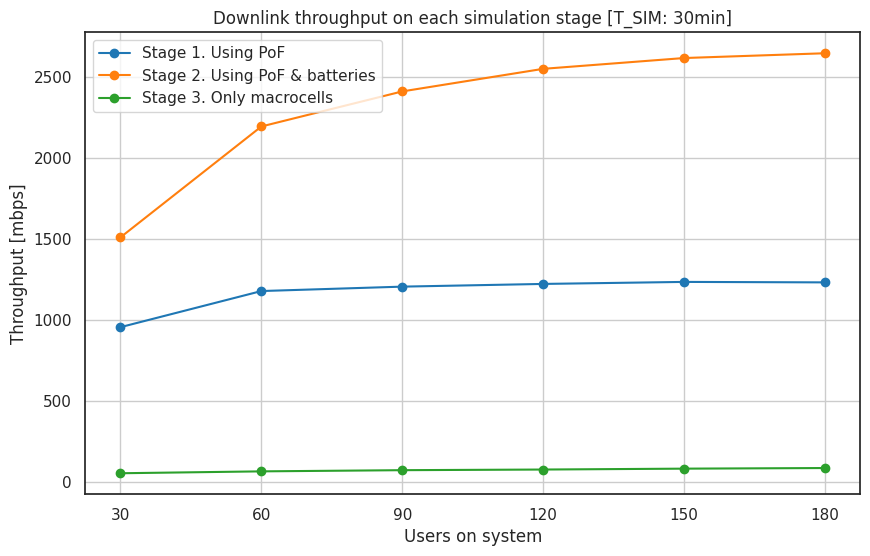

2. Percentages time inside femto and served by that


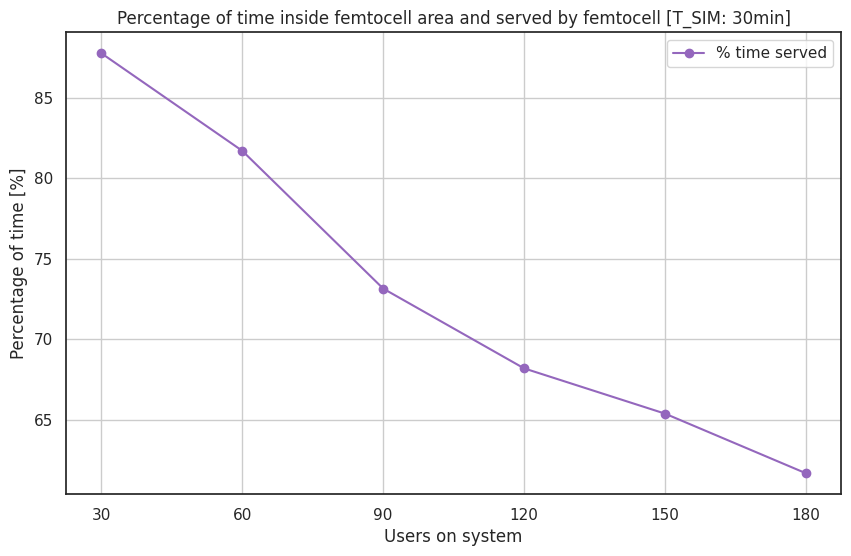

3. Percentages of sim time inside area


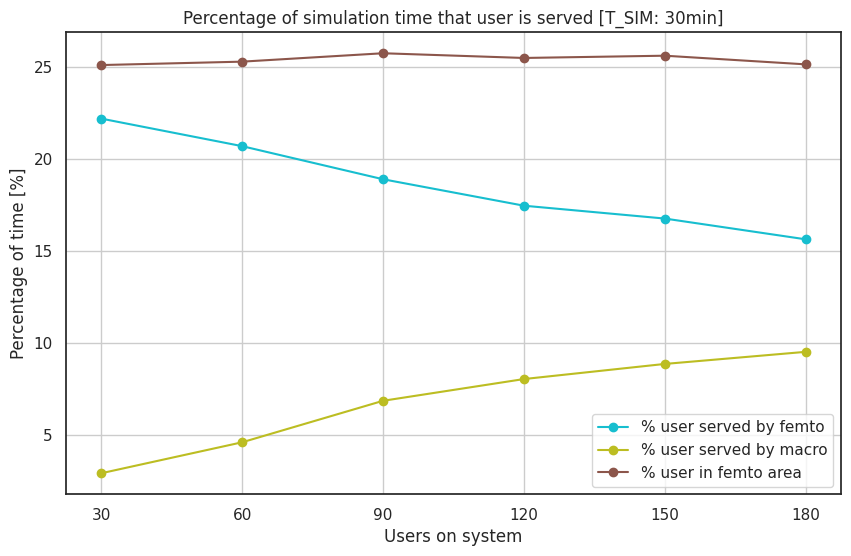

4. Remaining batteries


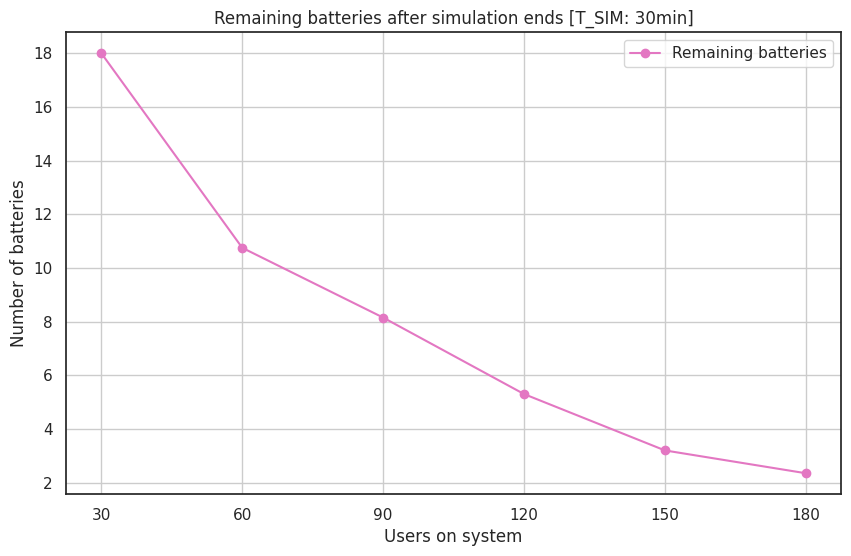

5. First battery dead


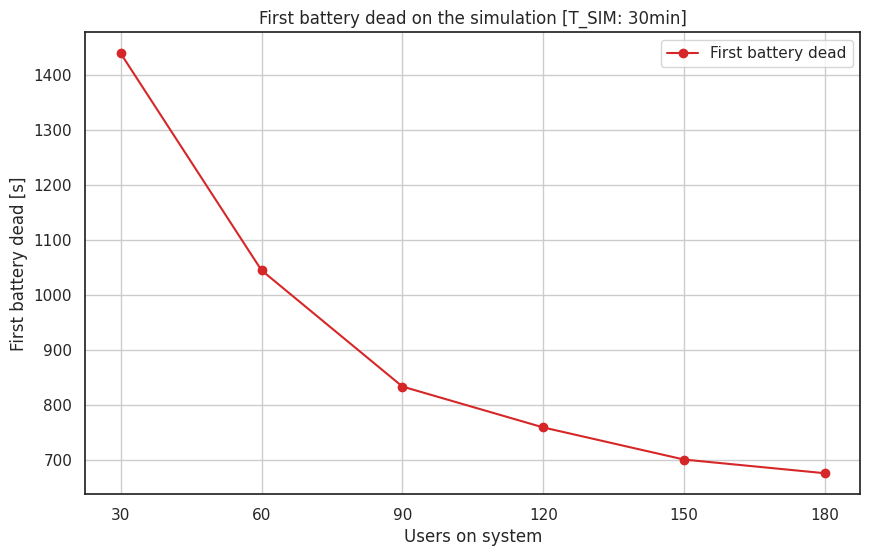

---------------------------------------------------------------------
---------------------------------------------------------------------
---------------------------------------------------------------------
Reading results of parametric: user-report-post_output-parametric.csv
1. Throughput plot


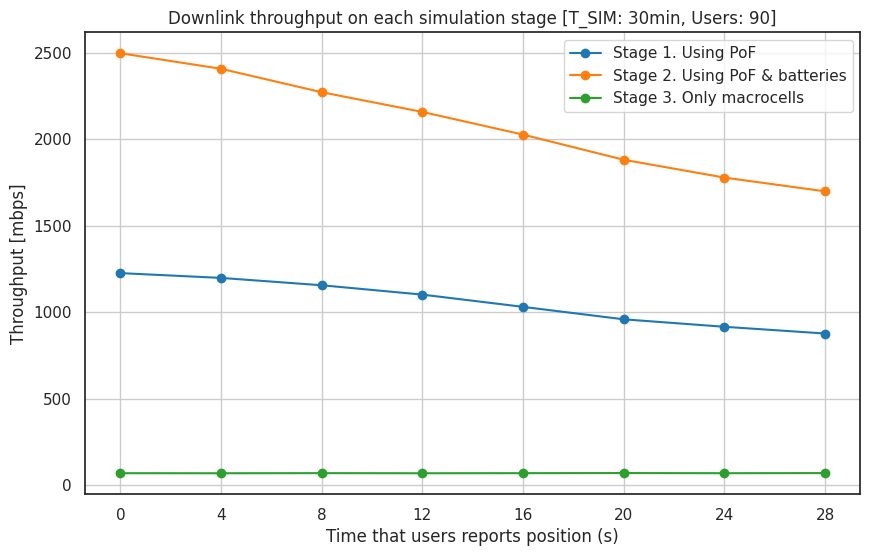

2. Percentages time inside femto and served by that


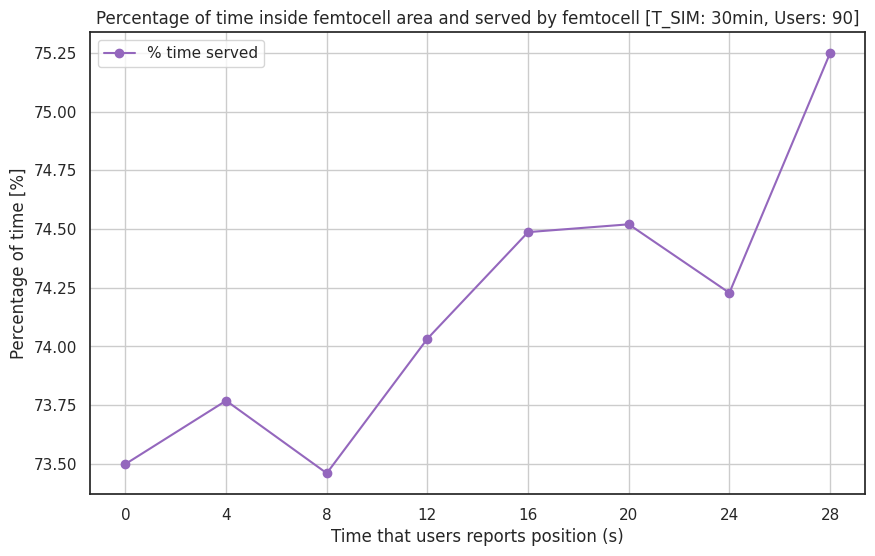

3. Percentages of sim time inside area


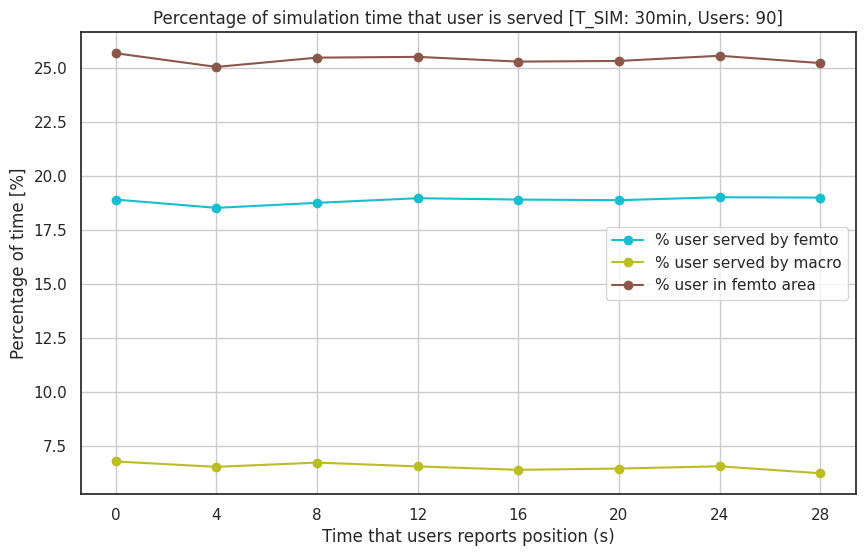

4. Remaining batteries


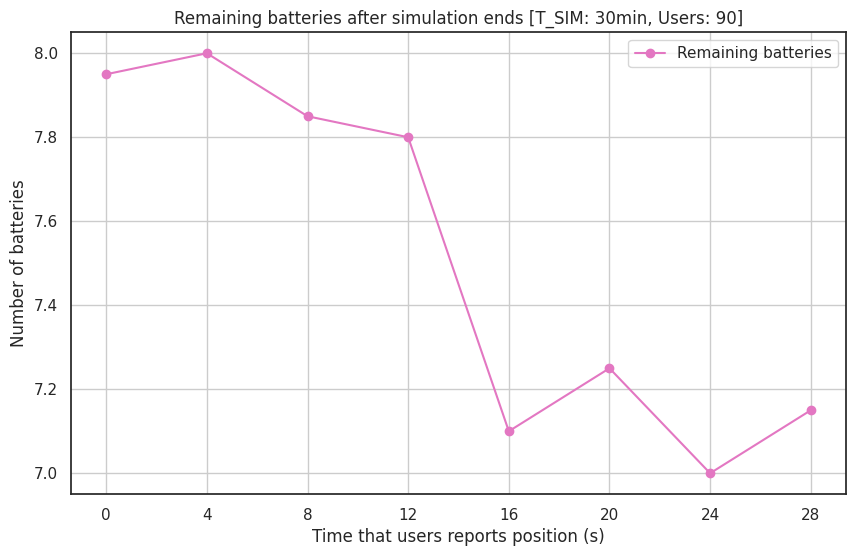

5. First battery dead


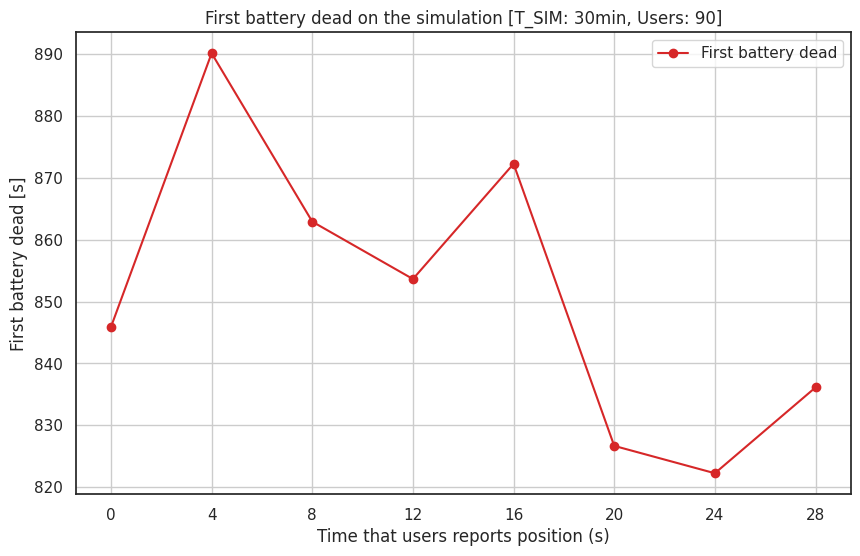

---------------------------------------------------------------------
---------------------------------------------------------------------
---------------------------------------------------------------------
Reading results of parametric: startup-time_output-parametric.csv
1. Throughput plot


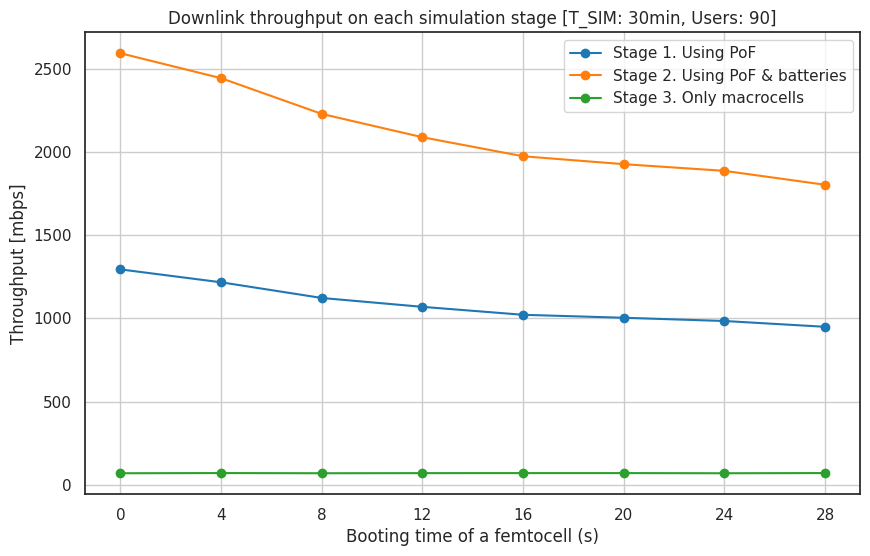

2. Percentages time inside femto and served by that


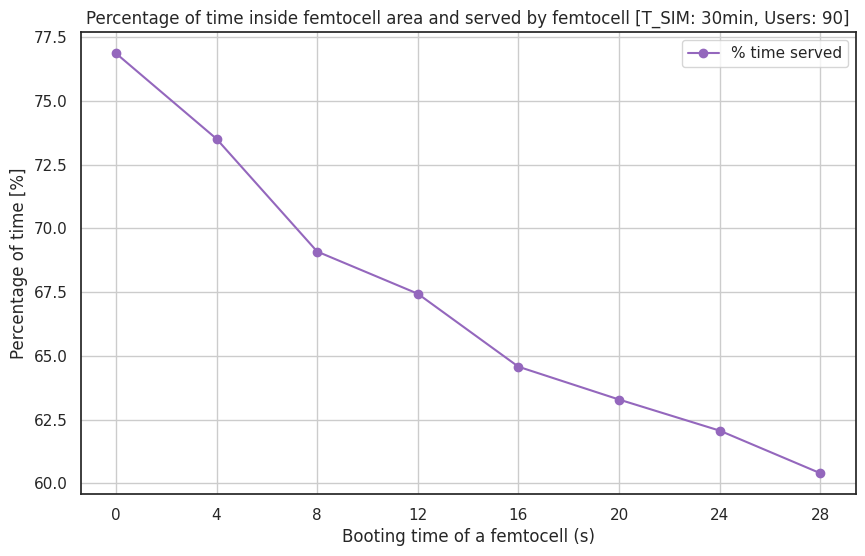

3. Percentages of sim time inside area


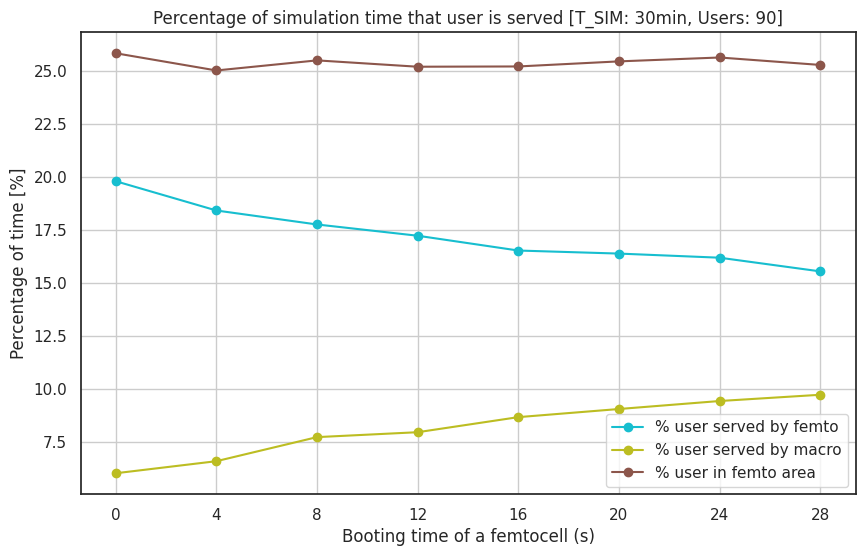

4. Remaining batteries


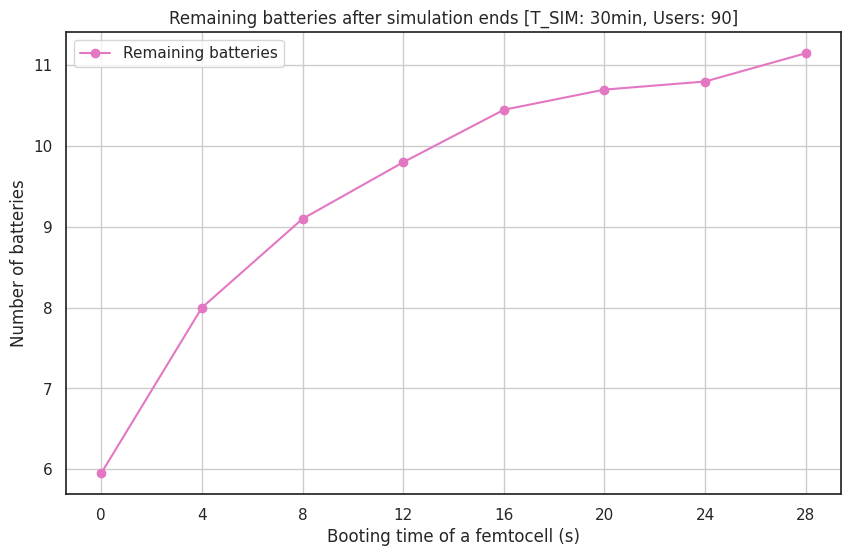

5. First battery dead


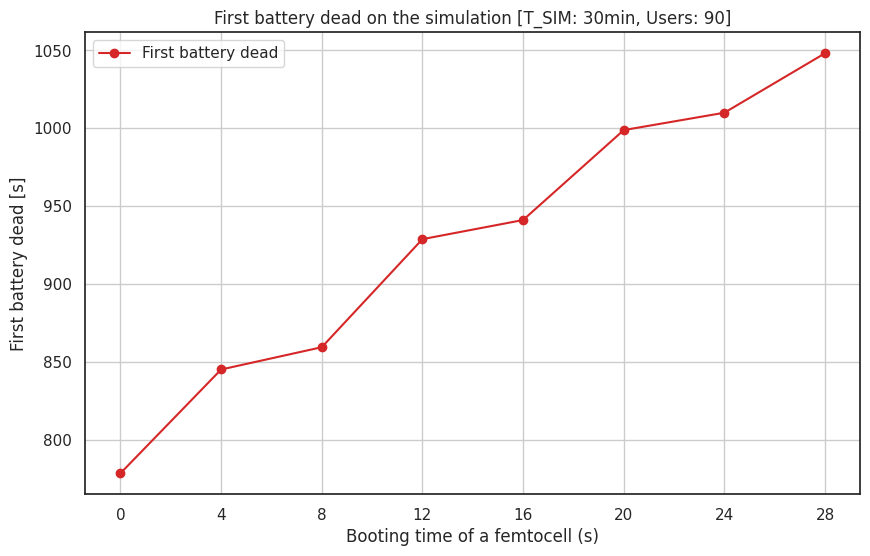

---------------------------------------------------------------------
---------------------------------------------------------------------
---------------------------------------------------------------------
END


In [68]:
for file_name in os.listdir(result_folder):
    if file_name.endswith('.csv'):  # check if file is a CSV
        print(f"Reading results of parametric: {file_name}")
        
        file_path = os.path.join(result_folder, file_name)
        
        if file_name == "users_output-parametric.csv":
            parametric_param = "Users"
            df = pd.read_csv(file_path)
            
            x_label = "Users on system"
            x_ticks = [30, 60, 90, 120, 150, 180]
            title_1 = "Downlink throughput on each simulation stage [T_SIM: 30min]"
            title_2 = "Percentage of time inside femtocell area and served by femtocell [T_SIM: 30min]"
            title_3 = "Percentage of simulation time that user is served [T_SIM: 30min]"
            title_4 = "Remaining batteries after simulation ends [T_SIM: 30min]"
            title_5 = "First battery dead on the simulation [T_SIM: 30min]"
        
        elif file_name == "user-report-post_output-parametric.csv":
            parametric_param = "user_report_position"
            df = pd.read_csv(file_path)
            df[parametric_param] = df[parametric_param] / 2 # In order to convert to seconds
            
            x_label = "Time that users reports position (s)"
            x_ticks = [0, 4, 8, 12, 16, 20, 24, 28]         # In seconds
            title_1 = "Downlink throughput on each simulation stage [T_SIM: 30min, Users: 90]"
            title_2 = "Percentage of time inside femtocell area and served by femtocell [T_SIM: 30min, Users: 90]"
            title_3 = "Percentage of simulation time that user is served [T_SIM: 30min, Users: 90]"
            title_4 = "Remaining batteries after simulation ends [T_SIM: 30min, Users: 90]"
            title_5 = "First battery dead on the simulation [T_SIM: 30min, Users: 90]"
        
        elif file_name == "startup-time_output-parametric.csv":
            parametric_param = "startup_max_tokens"
            df = pd.read_csv(file_path)
            df[parametric_param] = df[parametric_param] / 2 # In order to convert to seconds
            
            x_label = "Booting time of a femtocell (s)"
            x_ticks = [0, 4, 8, 12, 16, 20, 24, 28]         # In seconds
            title_1 = "Downlink throughput on each simulation stage [T_SIM: 30min, Users: 90]"
            title_2 = "Percentage of time inside femtocell area and served by femtocell [T_SIM: 30min, Users: 90]"
            title_3 = "Percentage of simulation time that user is served [T_SIM: 30min, Users: 90]"
            title_4 = "Remaining batteries after simulation ends [T_SIM: 30min, Users: 90]"
            title_5 = "First battery dead on the simulation [T_SIM: 30min, Users: 90]"
        
        #### Plotting
        # 1. Throughput (4 traces)
        print("1. Throughput plot")
        plt.figure(figsize=(10, 6))
        plt.plot(df[parametric_param], df['throughput_no_battery[mbps]'], '-o', label="Stage 1. Using PoF", color='tab:blue')
        plt.plot(df[parametric_param], df['throughput[mbps]'], '-o', label="Stage 2. Using PoF & batteries", color='tab:orange')
        #plt.plot(df[parametric_param], df['throughput_femto_battery[mbps]'], label="Batt (only Femto)")
        plt.plot(df[parametric_param], df['throughput_only_macro[mbps]'], '-o', label="Stage 3. Only macrocells", color='tab:green')
        plt.xlabel(xlabel=x_label)
        plt.ylabel('Throughput [mbps]')
        plt.xticks(x_ticks)
        plt.title(title_1)
        plt.legend()
        plt.grid()
        plt.show()
        
        # 2. Porcentajes [time_served]
        print("2. Percentages time inside femto and served by that")
        plt.figure(figsize=(10, 6))
        plt.plot(df[parametric_param], df['per_time_served'], '-o', label="% time served", color='tab:purple')
        plt.xlabel(xlabel=x_label)
        plt.ylabel('Percentage of time [%]')
        plt.xticks(x_ticks)
        plt.title(title_2)
        plt.legend()
        plt.grid()
        plt.show()
        
        # 3. Porcentajes [per_in_area]
        print("3. Percentages of sim time inside area")
        plt.figure(figsize=(10, 6))
        plt.plot(df[parametric_param], df['per_served_femto'], '-o', label="% user served by femto", color='tab:cyan')
        plt.plot(df[parametric_param], df['per_served_macro'], '-o', label="% user served by macro", color='tab:olive')
        plt.plot(df[parametric_param], df['per_in_area'], '-o', label="% user in femto area", color='tab:brown')
        plt.xlabel(xlabel=x_label)
        plt.ylabel('Percentage of time [%]')
        plt.xticks(x_ticks)
        plt.title(title_3)
        plt.legend()
        plt.grid()
        plt.show()
        
        # 4. Remaining batteries
        print("4. Remaining batteries")
        plt.figure(figsize=(10, 6))
        plt.plot(df[parametric_param], df['remaining_batt'], '-o', label="Remaining batteries", color='tab:pink')
        plt.xlabel(xlabel=x_label)
        plt.ylabel('Number of batteries')
        plt.xticks(x_ticks)
        plt.title(title_4)
        plt.legend()
        plt.grid()
        plt.show()
        
        # 5. First battery dead
        print("5. First battery dead")
        plt.figure(figsize=(10, 6))
        plt.plot(df[parametric_param], df['first_batt_dead[s]'], '-o', label="First battery dead", color='tab:red')
        plt.xlabel(xlabel=x_label)
        plt.ylabel('First battery dead [s]')
        plt.xticks(x_ticks)
        plt.title(title_5)
        plt.legend()
        plt.grid()
        plt.show()
        
        #########
        
        print("---------------------------------------------------------------------")
        print("---------------------------------------------------------------------")
        print("---------------------------------------------------------------------")
        
print("END")